# COGS 108 - Final Project 

# Overview

In this project, we analyzed county-level results of US presidential elections from 2000-2016 and the strength of the correlation of partisan vote share with 2 factors over time. Specifically, for each year, we calculated the strength of the correlation between partisan swings with population density as well as racial diversity. This enabled us to see which factors have strongly (or less strongly) correlated over time. This will help tell if a certain variable is a better predictor of a county's vote over time and could even predict patterns in the upcoming 2020 election.

# Names

- Nancy Bui
- Jayvee Inthisone
- Katarina Stefanovic
- Allison Tietz
- Frank Zhou

# Group Members IDs

- A13669676
- A13218641
- A14084974
- A14854110
- A14672642

# Research Question

How are presidential election margins in each county correlated with county population density and racial makeup and which factors have correlated more strongly (or less) over time? Also, has the strength of each of these factors' correlations with margins of victory changed over time?

## Background and Prior Work

Presidential election results from different years show that large portions of the country have drastically changed their party allegiances over time. In swing states, those changes can be fast and volatile. For example, it can be seen that voting patterns in midwestern states has shifted from voting reliably for democratic candidates to suddenly voting for republican ones in this past election. In contrast to those changes, urban areas across the nation like the metropolitan Atlanta area and Orange County, California have traditionally backed Republican candidates, but are now voting more Democratic at the federal level. Analyzing changes in voting patterns of the United States on a county level – particularly in swing states and the so-called “rust belt” region – will provide valuable information in where candidates should focus their campaign efforts during election season. 

On a state level, some states that have voted reliably Democratic in the past are now firmly Republican, like West Virginia. On the other hand, formerly Republican states and strongholds like Virginia have now become primarily Democratic states. Appalachia and the American south have seen some of the largest swings toward Republican candidates in recent years, while the states on the coasts have seen the largest swings toward Democrats. Since the controversial 2000 presidential election, some states have gone back and forth each election cycle. Many states have “pivot counties,” which may be a deciding factor in how a state votes. The changes of a particular state like Ohio – a perennial swing state that voted extremely Republican in 2016 – should be quantified to answer questions candidates may have such as, “Is it still worth it to campaign in Ohio, or should I start campaigning in a Democratically trending state like Georgia?” Tracks of these patterns over time can provide valuable practical information for future campaigns.

References (include links):
- 1) https://www.270towin.com/states/West_Virginia
- 2) https://www.270towin.com/states/

# Hypothesis


Our hypothesis is that the racial demographics of an area will have a stronger correlation with election margins of victory than the population density of an area, and that over time, both correlations will become stronger, revealing a sharp increase in partisanship over time.

We chose this hypothesis because in each presidential year since 2000, the Democratic margin of victory in each county has been increasingly positively in correlated with higher population density and more racial diversity. There seems to be a sharp increase in the strength of these correlations in the 2016 election. However, this is just an eye-test, and we are using this data analysis to see if it is really true or not. We specifically took this hypothesis as our stance because of the way we have perceived politics and everything that we know to be true in the political sphere.

# Dataset(s)

Demographics:

- Dataset Name: Intercensal Estimates of the Resident Population by Sex, Race, and Hispanic Origin for Counties: April 1, 2000 to July 1, 2010
- Link to the dataset: https://www.census.gov/data/datasets/time-series/demo/popest/intercensal-2000-2010-counties.html
- Number of observations: 65535
- Description: This dataset includes information about the sex, race, and Hispanic origin of people in each country in the United States along with the population estimates from 2000-2010. This is a very large dataset that includes many different counties from the states.  


- Dataset Name: Annual County Resident Population Estimates by Age, Sex, Race, and Hispanic Origin: April 1, 2010 to July 1, 2017 (United States)
- Link to the dataset: https://www.census.gov/data/datasets/2017/demo/popest/counties-detail.html
- Number of observations: (Note: due to the large file size, irrevelant columns have been pre-deleted)
- Description: This dataset includes information about the sex, race, and Hispanic origin of people in each country in the United States along with the population estimates from 2010-2017. This is a similar datset to the previous one, except with more recent data.

Election Results:

- Dataset Name: 2000 Election Data by State (All States by County)
- Link to the dataset: https://www.american.edu/spa/ccps/Data-Sets.cfm
- Number of observations: 3155
- Description: This dataset looks at the election data by county, including the raw numbers and percentages of citizens who voted for Gore, Bush, and other candidates in 2000. 


- Dataset Name: US presidential election county results 2004 through 2012
- Link to the dataset: https://github.com/helloworlddata/us-presidential-election-county-results/tree/master/data
- Number of observations: 9462
- Description: This dataset is similar to the one above in that it looks at the percentages of votes by county. This also includes data about the margin of victory, which was useful in assessing the correlation between county demographics and voting preferences. 


- Dataset Name: 2016 US County Level Presidential Results
- Link to the dataset: https://github.com/tonmcg/US_County_Level_Election_Results_08-16/blob/master/2016_US_County_Level_Presidential_Results.csv
- Number of observations: 3141
- Description: This dataset has voting information per county in terms of raw numbers. It has information on percentage point differences between Democrat and Republican votes.

    We combined the two datasets in the demographics section to obtain a dataset with the entire yearly information needed from 2000-2017. We combined the election results datasets to get samples of information from each election year from 2000-2016. With our two new datasets, we are now able to accurately assess a large enough sample of years and counties, in order to correctly do the regression.

# Setup

In [116]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning

First, we loaded all of our data into six dataframes: demog2000, demog 2010, countyDensities, results2000, results04_12, and results2016.

In [117]:
#Load all the data
demog2000 = pd.read_csv('co-est00int-sexracehisp.csv') #demographics 2000-2010
demog2010 = pd.read_csv('cc-est2017-alldata.csv') #demographics 2010-2017
countyDensities = pd.read_csv('ozone-county-population.csv') #population density by county
results2000 = pd.read_csv('COUNTY.csv') #election results 2000
results04_12 = pd.read_csv('us-presidential-election-county-results-2004-through-2012.csv') #election results 2004-2012
results2016 = pd.read_csv('2016_US_County_Level_Presidential_Results.csv') #election results 2016

Then, in the cell below, we dropped all the unnecessary rows from each new dataframe.

In [118]:
#Drop all unnecesary rows from each new dataframe
demog2000.drop(demog2000.columns[[0, 3, 4, 8, 10, 11, 12, 14, 15, 16, 18, 19, 20]], axis=1, inplace=True)
demog2010.drop(demog2010.columns[[0, 3, 4]], axis=1, inplace=True)
countyDensities.drop(countyDensities.columns[[2, 3, 4, 5]], axis=1, inplace=True)
results2000 = results2000[['STATE', 'COUNTY', 'PBUSH', 'PGORE']]
results04_12 = results04_12[['year', 'fips', 'pct_rep', 'pct_dem']]
results2016 = results2016[['per_dem', 'per_gop', 'combined_fips']]

From the first dataframe, we extracted all the rows in which sex is coded as 0, Hispanic origin is coded 0, and race is either 0 or 1.

In [119]:
#From demog2000, extract all rows with SEX=0, ORIGIN=0, & (RACE=0 or RACE=1)
demog2000['fips'] = demog2000['STATE']*1000 + demog2000['COUNTY']
demog2000tot = demog2000.loc[(demog2000['SEX'] == 0) & (demog2000['ORIGIN'] == 0) & (demog2000['RACE'] == 0)]
demog2000white = demog2000.loc[(demog2000['SEX'] == 0) & (demog2000['ORIGIN'] == 0) & (demog2000['RACE'] == 1)]
demog2000tot = demog2000tot.rename(columns={"POPESTIMATE2000": "2000TotalPop",
                                            "POPESTIMATE2004": "2004TotalPop",
                                            "POPESTIMATE2008": "2008TotalPop"})
demog2000white = demog2000white.rename(columns={"POPESTIMATE2000": "2000TotalWhite", 
                                                "POPESTIMATE2004": "2004TotalWhite",
                                                "POPESTIMATE2008": "2008TotalWhite"})
demog2000tot.drop(demog2000tot.columns[[0, 1, 2, 3, 4]], axis=1, inplace=True)
demog2000white.drop(demog2000white.columns[[0, 1, 2, 3, 4]], axis=1, inplace=True)
demog2000 = demog2000tot.merge(demog2000white, on="fips")

In the second dataframe, the demographic info from 2010 and on, we extracted all the rows with year coded as 5 or 9 and make another fips column.

In [120]:
#From demog2010, extract all rows with YEAR=5 or YEAR=9 & make another "fips" column the same as before
demog2010['totalWhite'] = demog2010['WA_MALE'] + demog2010['WA_FEMALE']
demog2010.drop(demog2010.columns[[5, 6]], axis=1, inplace=True)
demog2010['fips'] = demog2010['STATE']*1000 + demog2010['COUNTY']

demog2012 = demog2010.loc[(demog2010['YEAR'] == 5) & (demog2010['AGEGRP'] == 0)]
demog2016 = demog2010.loc[(demog2010['YEAR'] == 9) & (demog2010['AGEGRP'] == 0)]
demog2012 = demog2012.rename(columns={"TOT_POP": "2012TotalPop", "totalWhite": "2012TotalWhite"})
demog2016 = demog2016.rename(columns={"TOT_POP": "2016TotalPop", "totalWhite": "2016TotalWhite"})
demog2012.drop(demog2012.columns[[0, 1, 2, 3]], axis=1, inplace=True)
demog2016.drop(demog2016.columns[[0, 1, 2, 3]], axis=1, inplace=True)
demog2010 = demog2012.merge(demog2016, on='fips')

Here, we defined a couple of functions to convert from floats to ints, and to remove commas from the data.

In [121]:
def toInt(float_in):
    return int(float_in)

def remComma(string):
    return string.replace(',', '')

For the dataframe holding the election results from 2004 to 2012, we kept the "fips" column, but we cast all the elements in that column to ints using the toInt function we defined above. In the results2016 dataframe, we simply renamed the combined_fips column to "fips" so it would be consistent with the 2004-2012 dataframe.

In [122]:
countyDensities.columns.values[2] = "LandArea"
countyDensities["LandArea"] = countyDensities["LandArea"].apply(remComma)
countyDensities["LandArea"] = pd.to_numeric(countyDensities["LandArea"])
countyDensities['fips'] = countyDensities['STATE FIPS']*1000 + countyDensities['COUNTY FIPS']
countyDensities.drop(countyDensities.columns[[0, 1]], axis=1, inplace=True)

demog2000 = demog2000.merge(countyDensities, on='fips')
demog2010 = demog2010.merge(countyDensities, on='fips')

#From results04_12, keep the "fips" column, but cast all elements in the entire column to ints
#results04_12['fips'] = pd.to_numeric(results04_12['fips'], errors='coerce', downcast='integer')
#From results2016, rename the combined_fips col to just "fips"

Below, we calculated the population density and percentage of the population that was white for the presidential election years 2000, 2004, and 2008. We then renamed the columns of the demog2000 dataframe appropriately.

In [123]:
#calculate population density & white percent of population for 2000-2008
demog2000["2000TotalWhite"] /= demog2000["2000TotalPop"]
demog2000["2004TotalWhite"] /= demog2000["2004TotalPop"]
demog2000["2008TotalWhite"] /= demog2000["2008TotalPop"]
demog2000["2000TotalPop"] /= demog2000["LandArea"]
demog2000["2004TotalPop"] /= demog2000["LandArea"]
demog2000["2008TotalPop"] /= demog2000["LandArea"]
demog2000 = demog2000.rename(columns={"2000TotalWhite": "whitePct2000",
                                      "2004TotalWhite": "whitePct2004",
                                      "2008TotalWhite": "whitePct2008",
                                      "2000TotalPop": "density2000",
                                      "2004TotalPop": "density2004",
                                      "2008TotalPop": "density2008"})

The same thing that we did in the cell above for 2000, 2004, and 2008, we did below for 2012 and 2016. in the demog2010 dataframe.

In [124]:
#calculate population density & white percent of population for 2012 & 2016
demog2010["2012TotalWhite"] /= demog2010["2012TotalPop"]
demog2010["2016TotalWhite"] /= demog2010["2016TotalPop"]
demog2010["2012TotalPop"] /= demog2010["LandArea"]
demog2010["2016TotalPop"] /= demog2010["LandArea"]
demog2010 = demog2010.rename(columns={"2012TotalWhite": "whitePct2012",
                                      "2016TotalWhite": "whitePct2016",
                                      "2012TotalPop": "density2012",
                                      "2016TotalPop": "density2016"})

In the cell below, we standardized th fips codes for the dataframes holding presidential election results. This included casting them all as integers and getting rid of data that did not have a fips code.

In [125]:
#Standardize fips codes for presidential results files
results04_12['fips'] = pd.to_numeric(results04_12['fips'], errors='coerce')
results04_12 = results04_12.dropna()
results04_12['fips'] = results04_12['fips'].apply(toInt)

results2016 = results2016.rename(columns={"combined_fips": "fips"})

In this cell, we created a new column in the results2000 dataframe to hold the fips codes, and we standardized the data that we had for all the other columns in that dataframe. We used this data to create an entirely new dataframe called data2000 with only the elements that we needed from the results2000 dataframe.

In [126]:
#create dataframe for 2000 results
results2000['fips'] = 0
fips = demog2000['fips']
for i in range(67):
    results2000.loc[i, 'fips'] = fips[i]
for i in range(107, 262):
    results2000.loc[i, 'fips'] = fips[i - 11]
for i in range(262, 342):
    results2000.loc[i, 'fips'] = fips[i - 10]
    
results2000.loc[342, 'fips'] = 12086 #Miami Dade County, FL
for i in range(343, 373):
    results2000.loc[i, 'fips'] = fips[i - 11]
for i in range(373, 558):
    results2000.loc[i, 'fips'] = fips[i - 10]    
for i in range(558, 560):
    results2000.loc[i, 'fips'] = fips[i - 9]
for i in range(562, 1206):
    results2000.loc[i, 'fips'] = fips[i - 11]

results2000.loc[1206, 'fips'] = 24510 #Baltimore City, MD
for i in range(1207, 1228):
    results2000.loc[i, 'fips'] = fips[i - 12]
for i in range(1228, 1758):
    results2000.loc[i, 'fips'] = fips[i - 11]
    
results2000.loc[1758, 'fips'] = 32510 #Carson City, MD
for i in range(1759, 1775):
    results2000.loc[i, 'fips'] = fips[i - 12]
for i in range(1775, 1841):
    results2000.loc[i, 'fips'] = fips[i - 11]
    
for i in range(1841, 1861):
    results2000.loc[i, 'fips'] = fips[i - 10]
for i in range(1861, 1867):
    results2000.loc[i, 'fips'] = fips[i - 9] 
for i in range(1867, 1876):
    results2000.loc[i, 'fips'] = fips[i - 8]
results2000.loc[1876, 'fips'] = 36083 #Rensselaer county NY
for i in range(1877, 1896):
    results2000.loc[i, 'fips'] = fips[i - 6]
results2000.loc[1896, 'fips'] = 36005
results2000.loc[1897, 'fips'] = 36047
results2000.loc[1898, 'fips'] = 36061
results2000.loc[1899, 'fips'] = 36081
results2000.loc[1900, 'fips'] = 36085

for i in range(1901, 2932):
    results2000.loc[i, 'fips'] = fips[i - 11]
for i in range(2933, 3155):
    results2000.loc[i, 'fips'] = fips[i - 12]
    
results2000['PBUSH'] = pd.to_numeric(results2000['PBUSH'], errors='coerce')
results2000['PGORE'] = pd.to_numeric(results2000['PGORE'], errors='coerce')
results2000 = results2000.dropna()
results2000['margin_R'] = 100*(results2000['PBUSH'] - results2000['PGORE'])

data2000 = results2000[['fips', 'margin_R']].merge(demog2000[['density2000','whitePct2000','fips']], on='fips')

In the next few cells, we did the same thing as above for the 2004, 2008, 2012, and 2016 results, calling the new dataframes data2004, data2008, data2012, and data2016.

In [127]:
#create dataframe for 2004 results
results04_12['margin_R'] = results04_12['pct_rep'] - results04_12['pct_dem']
data2004 = results04_12.loc[results04_12['year'] == 2004]
data2004 = data2004[['fips', 'margin_R']].merge(demog2000[['density2004','whitePct2004','fips']], on='fips')

In [128]:
#Create dataframe for 2008 results
data2008 = results04_12.loc[results04_12['year'] == 2008]
data2008 = data2008[['fips', 'margin_R']].merge(demog2000[['density2008','whitePct2008','fips']], on='fips')

In [129]:
#Create dataframe for 2012 results
data2012 = results04_12.loc[results04_12['year'] == 2012]
data2012 = data2012[['fips', 'margin_R']].merge(demog2010[['density2012','whitePct2012','fips']], on='fips')

In [130]:
#Create dataframe for 2016 results
results2016['margin_R'] = (results2016['per_gop'] - results2016['per_dem'])*100
results2016.drop(results2016.columns[[0, 1]], axis=1, inplace=True)
data2016 = results2016.merge(demog2010[['density2016','whitePct2016','fips']], on='fips')
data2016 = data2016.iloc[28:]

As you can see in the cells below, we have printed out the first five rows of each of these five dataframes. They are now standardized and hold the same types of data!

In [131]:
data2000.head()

,fips,margin_R,density2000,whitePct2000
0,1001,40.97,74.055071,0.810840
1,1003,47.59,88.906417,0.878217
2,1005,0.89,32.789905,0.521523
3,1007,22.01,31.984542,0.790187
4,1009,42.79,79.263186,0.973409


In [132]:
data2004.head()

,fips,margin_R,density2004,whitePct2004
0,1001,52.0,81.364520,0.804139
1,1003,53.9,98.293856,0.877581
2,1005,9.9,31.967191,0.512780
3,1007,44.5,34.888577,0.770176
4,1009,62.6,83.942330,0.967353


In [133]:
data2008.head()

,fips,margin_R,density2008,whitePct2008
0,1001,47.8,89.626133,0.795071
1,1003,51.5,110.598044,0.877749
2,1005,1.4,31.425872,0.512119
3,1007,45.8,36.469092,0.766087
4,1009,69.5,88.488095,0.966366


In [134]:
data2012.head()

,fips,margin_R,density2012,whitePct2012
0,1001,45.95,92.401873,0.788064
1,1003,55.82,119.543284,0.874358
2,1005,-3.14,30.710518,0.504287
3,1007,46.68,36.393600,0.768294
4,1009,73.93,89.325595,0.962393


In [135]:
data2016.head()

,fips,margin_R,density2016,whitePct2016
28,1001,49.478934,92.992349,0.771953
29,1003,57.786162,130.526537,0.871702
30,1005,5.611165,29.127245,0.496857
31,1007,55.544124,36.353444,0.766624
32,1009,81.381973,89.274415,0.960217


# Data Analysis & Results

## Population Density vs. Margin of Republican Victory

First, we decided to analyze the correlation between population density and the margin by which Republican candidates won the county. If the Margin R is positive, it means that the Republican candidate won, and if it is negative, it means the Democratic candidate won.

### 2000

The two cells below create a scatterplot with a linear regression line of the population density and Republican margin of victory from the 2000 election and calculate the correlation coefficient R between those two variables.

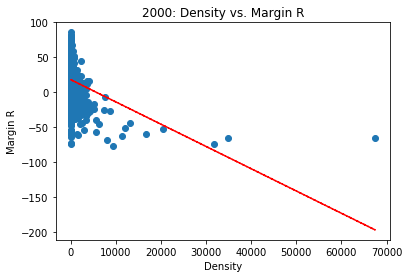

In [136]:
# Make two new lists to plot over x and y axes
data2000margin = data2000['margin_R']
data2000density = data2000['density2000']

# Make the scatterplot, label it, and include a linear regression line
corrplot2 = plt.scatter(data2000density, data2000margin)
plt.xlabel('Density')
plt.ylabel('Margin R')
plt.title('2000: Density vs. Margin R')
z2 = np.polyfit(data2000density, data2000margin, 1)
p2 = np.poly1d(z2)
plt.plot(data2000density, p2(data2000density), "r--")

In [137]:
R2000_Density = np.corrcoef(x = data2000density, y = data2000margin)
print(R2000_Density[0][1])

-0.225910372083


The R-value has a relatively small negative absolute value, suggesting that as population density increased, the margin of victory for the Republican candidate decreased slightly significantly.

In the next 8 code cells, we used the exact same methods as we did for the 2000 density data, and we applied it to each election year since then. We created the scatterplot and linear regression and we calculated the R-value for the data from each year.

### 2004

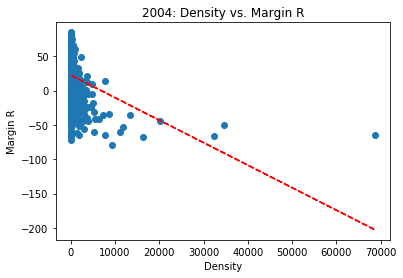

In [138]:
# Make two new lists to plot over x and y axes
data2004margin = data2004['margin_R']
data2004density = data2004['density2004']

# Make the scatterplot, label it, and include a linear regression line
corrplot4 = plt.scatter(data2004density, data2004margin)
plt.xlabel('Density')
plt.ylabel('Margin R')
plt.title('2004: Density vs. Margin R')
z4 = np.polyfit(data2004density, data2004margin, 1)
p4 = np.poly1d(z4)
plt.plot(data2004density, p4(data2004density), "r--")

In [139]:
R2004_Density = np.corrcoef(x = data2004density, y = data2004margin)
print(R2004_Density[0][1])

-0.222166675526


The R-value above for the correlation between population density and Republican margin of victory is very similar to the 2000 R-value for the same variables, suggesting a similar conclusion that there is a weak negative linear correlation between the variables. Below is the same process for 2008.

### 2008

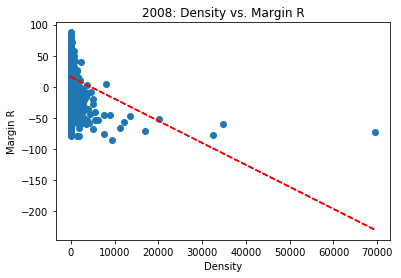

In [140]:
# Make two new lists to plot over x and y axes
data2008margin = data2008['margin_R']
data2008density = data2008['density2008']

# Make the scatterplot, label it, and include a linear regression line
corrplot6 = plt.scatter(data2008density, data2008margin)
plt.xlabel('Density')
plt.ylabel('Margin R')
plt.title('2008: Density vs. Margin R')
z6 = np.polyfit(data2008density, data2008margin, 1)
p6 = np.poly1d(z6)
plt.plot(data2008density, p6(data2008density), "r--")

In [141]:
R2008_Density = np.corrcoef(x = data2008density, y = data2008margin)
print(R2008_Density[0][1])

-0.218930022794


The number above is the R-value for the correlation between population density and Republican margin of victory in 2008. It is similar to both 2000 and 2004, suggesting the same conclusion that there is a weak negative linear correlation between population density and margin of victory for Republican candidates. Next, we applied the same process to the data from 2012.

### 2012

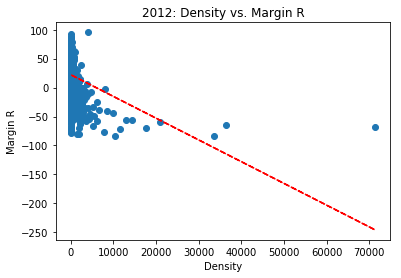

In [142]:
# Make two new lists to plot over x and y axes
data2012margin = data2012['margin_R']
data2012density = data2012['density2012']

# Make the scatterplot, label it, and include a linear regression line
corrplot8 = plt.scatter(data2012density, data2012margin)
plt.xlabel('Density')
plt.ylabel('Margin R')
plt.title('2012: Density vs. Margin R')
z8 = np.polyfit(data2012density, data2012margin, 1)
p8 = np.poly1d(z8)
plt.plot(data2012density, p8(data2012density), "r--")

In [143]:
R2012_Density = np.corrcoef(x = data2012density, y = data2012margin)
print(R2012_Density[0][1])

-0.226609046593


The above number is the R-value for the correlation between population density and Republican margin of victory for 2012, and it suggest the same conclusion as the previous three R-values for these two variables - that is - that there is a weak negative linear correlation between them. Below is the same process for the 2016 election.

### 2016

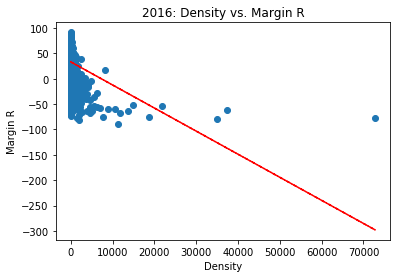

In [144]:
# Make two new lists to plot over x and y axes
data2016margin = data2016['margin_R']
data2016density = data2016['density2016']

# Make the scatterplot, label it, and include a linear regression line
corrplot10 = plt.scatter(data2016density, data2016margin)
plt.xlabel('Density')
plt.ylabel('Margin R')
plt.title('2016: Density vs. Margin R')
z10 = np.polyfit(data2016density, data2016margin, 1)
p10 = np.poly1d(z10)
plt.plot(data2016density, p10(data2016density), "r--")

In [145]:
R2016_Density = np.corrcoef(x = data2016density, y = data2016margin)
print(R2016_Density[0][1])

-0.269967921264


While still suggesting a pretty weak negative linear correlation between population density and Republican margin of victory, this R-value is more different from the rest. The other R-values stay between -0.218 and -0.227, but this one jumps to almost -0.267, suggesting it may be a change from the previous patterns. 

### R-Values Analysis

The next cell creates a figure with six subplots. The first 5 are smaller, less detailed versions of the 5 plots above, and the sixth is a representation of all the R-values over time. This makes it easier to see all the data together, and it shows how the final R-value for 2016 drops so much.

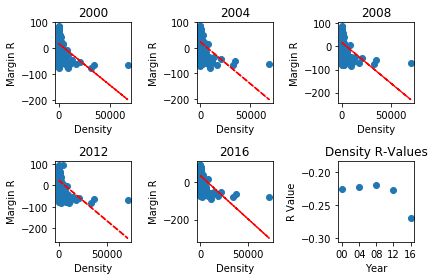

In [146]:
# Create figure with six subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=False, sharey=False)

# Plot out first subplot with 2000 data
ax1.scatter(data2000density, data2000margin)
ax1.plot(data2000density, p2(data2000density), "r--")
ax1.set_xlabel('Density')
ax1.set_ylabel('Margin R')
ax1.set_title('2000')

# Plot out second subplot with 2004 data
ax2.scatter(data2004density, data2004margin)
ax2.plot(data2004density, p4(data2004density), "r--")
ax2.set_xlabel('Density')
ax2.set_ylabel('Margin R')
ax2.set_title('2004')

# Plot out third subplot with 2008 data
ax3.scatter(data2008density, data2008margin)
ax3.plot(data2008density, p6(data2008density), "r--")
ax3.set_xlabel('Density')
ax3.set_ylabel('Margin R')
ax3.set_title('2008')

# Plot out fourth subplot with 2012 data
ax4.scatter(data2012density, data2012margin)
ax4.plot(data2012density, p8(data2012density), "r--")
ax4.set_xlabel('Density')
ax4.set_ylabel('Margin R')
ax4.set_title('2012')

# Plot out fifth subplot with 2016 data
ax5.scatter(data2016density, data2016margin)
ax5.plot(data2016density, p10(data2016density), "r--")
ax5.set_xlabel('Density')
ax5.set_ylabel('Margin R')
ax5.set_title('2016')

# Create two new lists to plot R-values over years
Years = ['00', '04', '08', '12', '16']
R_Density = [R2000_Density[0][1], R2004_Density[0][1], R2008_Density[0][1],\
             R2012_Density[0][1], R2016_Density[0][1]]

# Plot out sixth subplot with R-value data
ax6.scatter(Years, R_Density)
ax6.set_xlabel('Year')
ax6.set_ylabel('R Value')
ax6.set_title('Density R-Values')

# Print out the plots
plt.tight_layout()
plt.show()

In [147]:
R_Density_RValues = np.corrcoef(x = [2000,2004,2008,2012,2016], y = R_Density)
print(R_Density_RValues[0][1])

-0.695182664098


In the above cell, we calculated the R-value of all of the different R-values for each year measuring the correlation between population density and Republican margin of victory. This R-value measures the strength of the linear correlation between year and the strength of each of those correlations. Although this is a small sample size, there is a strong negative linear relationship, suggesting that the correlation becomes more strongly negative over time.

## Percent White vs Margin of Republican Victory

After doing analysis on population density, we went through the relationship between the percentage of a county that was white and the margin of victory by Republican candidates, applying the same methods as before. The first 10 code cells all handle the relationship between the percentage of the population in each county that is white and the Republican candidate's margin of victory.

### 2000

The next two cells below handle the demographic and margin of victory relationship for 2000.

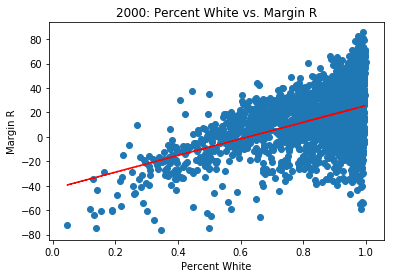

In [148]:
# Create a new list to plot data with - margin already exists
data2000white = data2000['whitePct2000']

# Make the scatterplot, label it, and include a linear regression line
corrplot = plt.scatter(data2000white, data2000margin)
plt.xlabel('Percent White')
plt.ylabel('Margin R')
plt.title('2000: Percent White vs. Margin R')
z = np.polyfit(data2000white, data2000margin, 1)
p = np.poly1d(z)
plt.plot(data2000white, p(data2000white), "r--")

In [149]:
R2000_White = np.corrcoef(x = data2000white, y = data2000margin)
print(R2000_White[0][1])

0.451552432426


The above number is the R-value for the relationship between the white percentage of the population in each county and the Republican margin of victory. This R-value suggests a moderate positive linear correlation between the two values. Below, the same process is applied to data from 2004.

### 2004

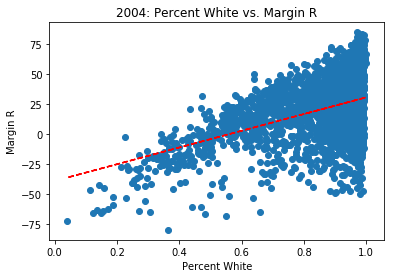

In [150]:
# Create a new list to plot data with - margin already exists
data2004white = data2004['whitePct2004']

# Make the scatterplot, label it, and include a linear regression line
corrplot3 = plt.scatter(data2004white, data2004margin)
plt.ylabel('Margin R')
plt.xlabel('Percent White')
plt.title('2004: Percent White vs. Margin R')
z3 = np.polyfit(data2004white, data2004margin, 1)
p3 = np.poly1d(z3)
plt.plot(data2004white, p3(data2004white), "r--")

In [151]:
R2004_White = np.corrcoef(x = data2004white, y = data2004margin)
print(R2004_White[0][1])

0.438871175527


The R-value above is similar, but slightly lower than the previous one, suggesting a slightly weaker, but still moderate positive linear correlation between the two values. Below, the same process is applied to data from 2008.

### 2008

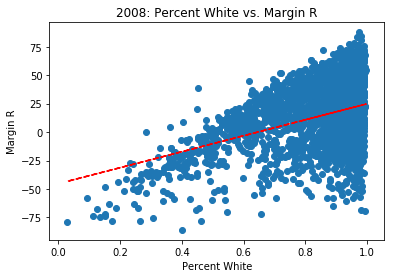

In [152]:
# Create a new list to plot data with - margin already exists
data2008white = data2008['whitePct2008']

# Make the scatterplot, label it, and include a linear regression line
corrplot5 = plt.scatter(data2008white, data2008margin)
plt.ylabel('Margin R')
plt.xlabel('Percent White')
plt.title('2008: Percent White vs. Margin R')
z5 = np.polyfit(data2008white, data2008margin, 1)
p5 = np.poly1d(z5)
plt.plot(data2008white, p5(data2008white), "r--")

In [153]:
R2008_White = np.corrcoef(x = data2008white, y = data2008margin)
print(R2008_White[0][1])

0.403824907952


This R-value is similar, but slightly lower than the previous one, suggesting a weaker, but still pretty moderate positive linear correlation between the two values. Below, the same process is applied to data from 2012.

### 2012

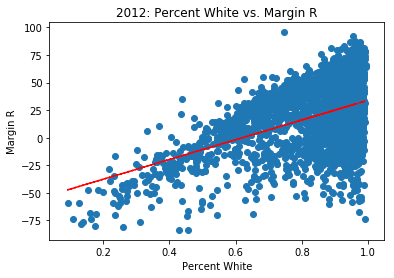

In [154]:
# Create a new list to plot data with - margin already exists
data2012white = data2012['whitePct2012']

# Make the scatterplot, label it, and include a linear regression line
corrplot7 = plt.scatter(data2012white, data2012margin)
plt.ylabel('Margin R')
plt.xlabel('Percent White')
plt.title('2012: Percent White vs. Margin R')
z7 = np.polyfit(data2012white, data2012margin, 1)
p7 = np.poly1d(z7)
plt.plot(data2012white, p7(data2012white), "r--")

In [155]:
R2012_White = np.corrcoef(x = data2012white, y = data2012margin)
print(R2012_White[0][1])

0.481562434338


This R-value is definitely higher than the previous one, suggesting a stronger, but still moderate positive linear correlation between the two values. Below, the same process is applied to data from 2016.

### 2016

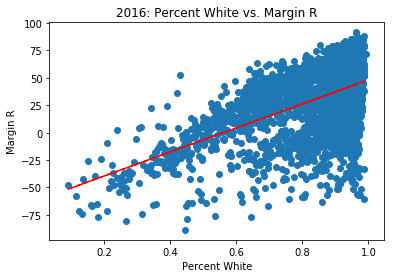

In [156]:
# Create a new list to plot data with - margin already exists
data2016white = data2016['whitePct2016']

# Make the scatterplot, label it, and include a linear regression line
corrplot9 = plt.scatter(data2016white, data2016margin)
plt.ylabel('Margin R')
plt.xlabel('Percent White')
plt.title('2016: Percent White vs. Margin R')
z9 = np.polyfit(data2016white, data2016margin, 1)
p9 = np.poly1d(z9)
plt.plot(data2016white, p9(data2016white), "r--")

In [157]:
R2016_White = np.corrcoef(x = data2016white, y = data2016margin)
print(R2016_White[0][1])

0.564087698928


Here, the R-value jumps up again by almost a full 0.1, suggesting a stronger correlation than all the previous years.

### R-Values Analysis

Below, there is a large figure with all of the different datasets plotted together so it is easier to see subtle differences. In addition to this, the sixth subplot is a plot of all the R-values for each year, so it is easier to see how the strength of the positive linear correlation changes over time.

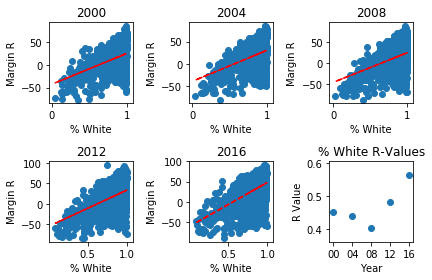

In [158]:
# Create figure with six subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=False, sharey=False)

# Plot out first subplot with 2000 data
ax1.scatter(data2000white, data2000margin)
ax1.plot(data2000white, p(data2000white), "r--")
ax1.set_xlabel('% White')
ax1.set_ylabel('Margin R')
ax1.set_title('2000')

# Plot out second subplot with 2004 data
ax2.scatter(data2004white, data2004margin)
ax2.plot(data2004white, p3(data2004white), "r--")
ax2.set_xlabel('% White')
ax2.set_ylabel('Margin R')
ax2.set_title('2004')

# Plot out third subplot with 2008 data
ax3.scatter(data2008white, data2008margin)
ax3.plot(data2008white, p5(data2008white), "r--")
ax3.set_xlabel('% White')
ax3.set_ylabel('Margin R')
ax3.set_title('2008')

# Plot out first subplot with 2012 data
ax4.scatter(data2012white, data2012margin)
ax4.plot(data2012white, p7(data2012white), "r--")
ax4.set_xlabel('% White')
ax4.set_ylabel('Margin R')
ax4.set_title('2012')

# Plot out fifth subplot with 2016 data
ax5.scatter(data2016white, data2016margin)
ax5.plot(data2016white, p9(data2016white), "r--")
ax5.set_xlabel('% White')
ax5.set_ylabel('Margin R')
ax5.set_title('2016')

# Create two new lists to plot R-values over years
Years = ['00', '04', '08', '12', '16']
R_White = [R2000_White[0][1], R2004_White[0][1], R2008_White[0][1],\
             R2012_White[0][1], R2016_White[0][1]]

# Plot out sixth subplot with R-value data
ax6.scatter(Years, R_White)
ax6.set_xlabel('Year')
ax6.set_ylabel('R Value')
ax6.set_title('% White R-Values')

# Print out the plots
plt.tight_layout()
plt.show()

In [159]:
R_White_RValues = np.corrcoef(x = [2000,2004,2008,2012,2016], y = R_White)
print(R_White_RValues[0][1])

0.699466634984


In the above cell, we calculated the R-value of all of the different R-values for each year measuring the correlation between population density and Republican margin of victory. This R-value measures the strength of the linear correlation between year and the strength of each of those correlations. Although this is a small sample size, there is a strong positive linear relationship, suggesting that the correlation becomes more strongly positive over time.

# Ethics & Privacy

In our research question since we are additionally analyzing the correlation of racial diversity and population density in accordance to the margins of victory, the analysis of race may bring into question multiracial advocacy and concerns within the United States. 

For our data collected, one major ethical consideration is that individual voter data and voter records are private & confidential. However, we are using population metrics, which do not single out specific voters, so the issue of voter privacy is less pressing. Also, we have mitigated collection bias by collecting our data from the government analytics. As such, we have minbimized the possibility of bias in our data from collecting from official sources and using large population metrics and densities. 

In the usage of our data, an additional concern of security is that there is currently no system to protect and secure our data through third party software and access controls nor is there one to remove the data once the research has been completed. 

In our analysis, since we have tailored our models to fit our research question, there is a possible concern that we may have missed additional metrics. However, since all the variables in each year are tested in the same way for correlation, we have ommitted any bias in our analysis and have communicated the correlations clearly to further understand our research question. 

The last major ethical issue to take into account is how these data can be used in the future, considering the prevalence of gerrymandering in this country. The more that lawmakers know about the voting patterns of specific counties, the more they can change county lines to maximize the likelihood of members of their party being elected.

# Conclusion & Discussion

The correlations between population density and Republican margin of victory for each election year from 2000 to 2016 are all pretty weak negative linear correlations, even though they do become stronger over time.

The correlations between the percent of the population that is white and Republican margin of victory, however, are all moderately strong and also get stronger over time.

Our research question asked which factor is more strongly correlated with Republican margin of victory, and across the board, that is the demographics factor, rather than the population density factor. Those r-values were consistently above 0.4 in magnititude, while the population density r-values were consistently below 0.3 in magnitude. This suggests a stronger linear correlation (regardless of whether it was positive or negative) between racial demographics and margin of victory.

The research question also asked if how the correlations for each factor change over time, and for both factors, there is a strong linear correlation (of the correlations themselves) over time, suggesting that they get stronger. For population density, the correlation with margin of victory becomes more strongly negative over time, and for population demographics, the correlation between that and margin of victory becomes more strongly positive.

In our hypothesis, we stated that we believed the population demographics would be more strongly correlated with election results than the population density, and we were correct in that statement. We also said that the correlations would get stronger over time. We were correct on this matter as well.

The increase in the strength of the correlations over time suggests an overall increase in polarization of and partisanship in the country. This is because it is becoming easier to more accurately predict the way a county vote based on how many people live in its area and what races they are. These correlations show a consolidation of Democratic voting blocks into highly dense, most likely urban areas of the country, and the increased correlation between racial lines and party-voting lines.

Because of the small sample size of only five presidential election years, it is difficult to draw a strong conclusion, but everything that we calculated ended up confirming our hypothesis. Plus, the nature of the results of the 2016 election (and how they shocked most data scientists) suggest that there is a fundamental change in the way that people make political voting decisions in the United States, so getting a larger sample size and pulling from further back in history may not be the most useful thing to do in this situation. We will probably have to wait and see how the next few elections go and then reevaluate to get an accurate answer on whether these trends we see are actually real or not.